## Decision Trees vs Random Forests
In  this exercise, you will compare the decision tree classifier with random forests.
0. Visualize the created datasets
1. Use the train_test_split function to split the dataset into 30/70 sets (set random seed=1)
2. Fit a decision tree to all 3 datasets and report train and test accuracy (random seed=1, default hyperparameters)
3. Do the same for a random forest with 20 trees (random seed=1, default hyperparameters)
4. plot the decision contours on all 6 datasets and comment on their differences. 
5. What can you say about the bias and variance of each classifier? Do you observe any over or under-fitting?
6. plot the 2 ROC curves for each dataset in 6 different plots. Also report the area under each curve.


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from matplotlib.pyplot import figure 
from sklearn.metrics import roc_curve, auc
figure(figsize=(15,15))
#import packages here


C:\Users\Rohit Kumar\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


<Figure size 1500x1500 with 0 Axes>

In [2]:
datasets=[]
for i in range(6):
    datasets.append((np.load('X{}.npy'.format(i)),np.load('y{}.npy'.format(i))))



In [23]:
def plot_contours(model, X, y):
    cmap = plt.cm.RdYlBu
    plot_step = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),np.arange(y_min, y_max, plot_step))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=ListedColormap(['r', 'y', 'b']),edgecolor='k', s=20)
    return 

Dataset0: 
train accuracy:  1.0
test accuracy:  0.7571428571428571
Area under Roc curve:  0.7755555555555556


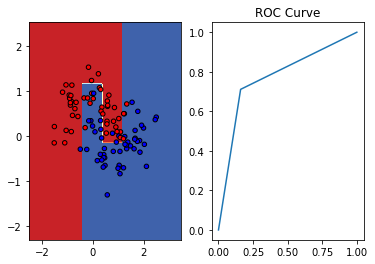

Dataset1: 
train accuracy:  1.0
test accuracy:  0.7857142857142857
Area under Roc curve:  0.796888141295206


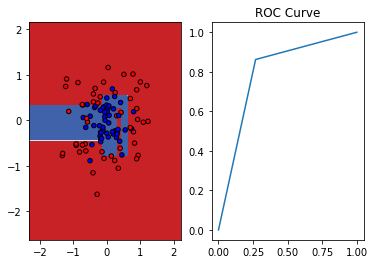

Dataset2: 
train accuracy:  1.0
test accuracy:  0.8285714285714286
Area under Roc curve:  0.8297697368421053


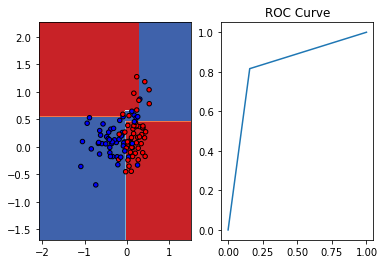

Dataset3: 
train accuracy:  1.0
test accuracy:  0.8
Area under Roc curve:  0.803453947368421


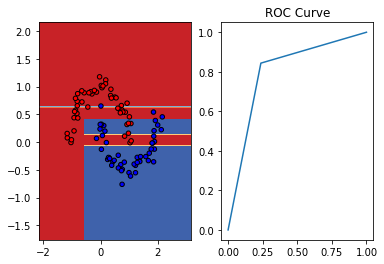

Dataset4: 
train accuracy:  1.0
test accuracy:  0.8857142857142857
Area under Roc curve:  0.8988095238095238


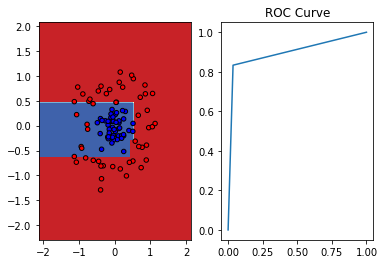

Dataset5: 
train accuracy:  1.0
test accuracy:  1.0
Area under Roc curve:  1.0


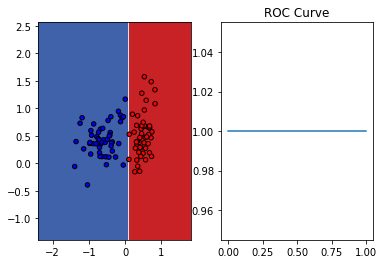

In [16]:

for i in range(6):
    X = np.load('X{}.npy'.format(i))
    y = np.load('y{}.npy'.format(i))
    Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.7, random_state = 1)
    model = DecisionTreeClassifier(random_state = 1)
    model.fit(Xtrain, ytrain)
    pred = model.predict(Xtest)
    fpr, tpr, threshold = roc_curve(pred, ytest)
    area = auc(fpr, tpr)
    print('Dataset{}: '.format(i))
    print('train accuracy: ', model.score(Xtrain, ytrain))
    print('test accuracy: ', model.score(Xtest, ytest))
    print('Area under Roc curve: ', area)
    fig, ax = plt.subplots(1, 2)
    cmap = plt.cm.RdYlBu
    plot_step = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),np.arange(y_min, y_max, plot_step))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = ax[0].contourf(xx, yy, Z, cmap=cmap)
    ax[0].scatter(X[:, 0], X[:, 1], c=y, cmap=ListedColormap(['r', 'y', 'b']),edgecolor='k', s=20)
    roc_auc = auc(fpr, tpr)
    ax[1].plot(fpr, tpr)
    ax[1].title.set_text('ROC Curve')
    plt.pause(0.0001)
    

Dataset0: 
train accuracy:  1.0
test accuracy:  0.8714285714285714
Area under Roc curve:  0.8746898263027295


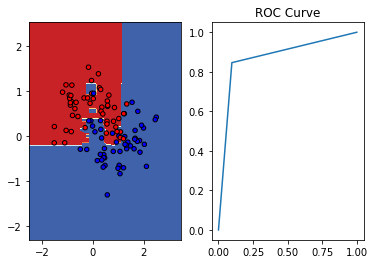

Dataset1: 
train accuracy:  0.9666666666666667
test accuracy:  0.8571428571428571
Area under Roc curve:  0.8666666666666668


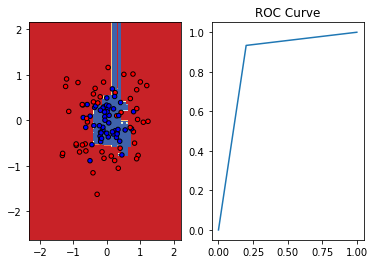

Dataset2: 
train accuracy:  1.0
test accuracy:  0.8285714285714286
Area under Roc curve:  0.829248366013072


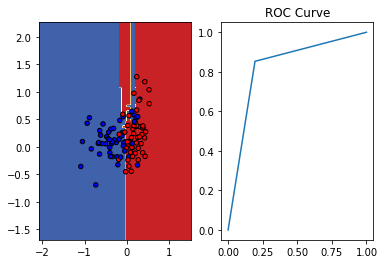

Dataset3: 
train accuracy:  1.0
test accuracy:  0.9428571428571428
Area under Roc curve:  0.9449013157894737


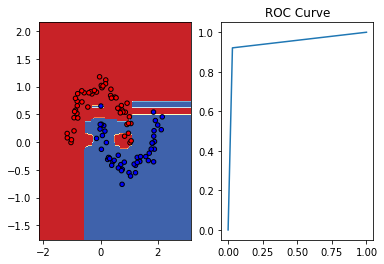

Dataset4: 
train accuracy:  1.0
test accuracy:  0.9
Area under Roc curve:  0.9069478908188586


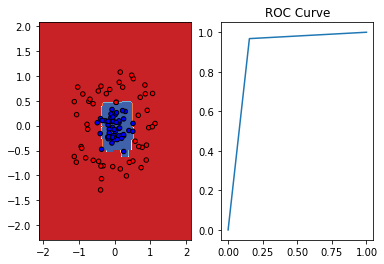

Dataset5: 
train accuracy:  1.0
test accuracy:  1.0
Area under Roc curve:  1.0


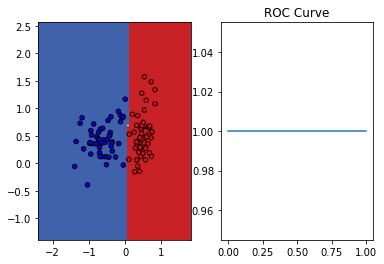

In [17]:
for i in range(6):
    X = np.load('X{}.npy'.format(i))
    y = np.load('y{}.npy'.format(i))
    Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.7, random_state = 1)
    model = RandomForestClassifier(n_estimators = 20, random_state = 1)
    model.fit(Xtrain, ytrain)
    pred = model.predict(Xtest)
    fpr, tpr, threshold = roc_curve(pred, ytest)
    area = auc(fpr, tpr)
    print('Dataset{}: '.format(i))
    print('train accuracy: ', model.score(Xtrain, ytrain))
    print('test accuracy: ', model.score(Xtest, ytest))
    print('Area under Roc curve: ', area)
    fig, ax = plt.subplots(1, 2)
    cmap = plt.cm.RdYlBu
    plot_step = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),np.arange(y_min, y_max, plot_step))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = ax[0].contourf(xx, yy, Z, cmap=cmap)
    ax[0].scatter(X[:, 0], X[:, 1], c=y, cmap=ListedColormap(['r', 'y', 'b']),edgecolor='k', s=20)
    roc_auc = auc(fpr, tpr)
    ax[1].plot(fpr, tpr)
    ax[1].title.set_text('ROC Curve')
    plt.pause(0.0001)

- from the decision are underfitting. Has more bias, it doesn't generalize the data
- Where as the random forests are overfitting in dataset 1,2,3 and 4.
- 

## Digit Classification
In this exercise you will perform handwritten digit classificaiton using random forests and study the effect of hyperparameters on random forests.
1. Load the digits dataset from sklearn and visualize 10 samples.
2. Vary the number of trees in a random forest classifier from 1 to 1000 in 10 logarithmic steps using the np.logspace function and plot the accuracy. Explain the results.
3. Observe the changes in performance when you vary the max depth of trees from 1 to 10 in steps of 1. Draw an accuracy heat-map by varying both the number of trees and max depth. Explain the results. (a heatmap is a 2D array of scalars. In this case the scalar is accuracy and the axes of the matrix vary the depth and number of trees)

In [1]:
from sklearn.datasets import load_digits

In [2]:
digits_data = load_digits()

In [3]:
X = digits_data.data
y = digits_data.target

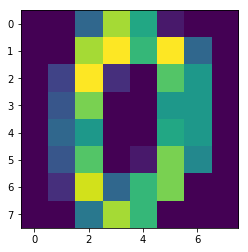

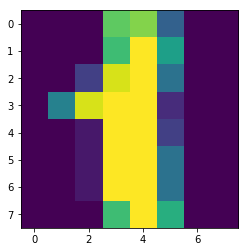

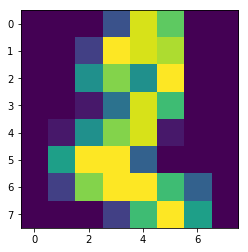

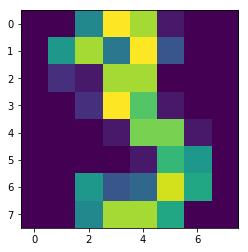

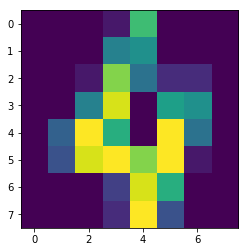

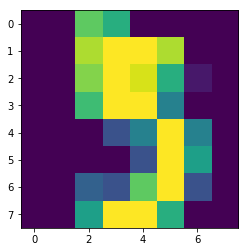

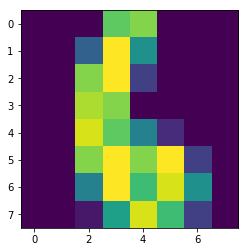

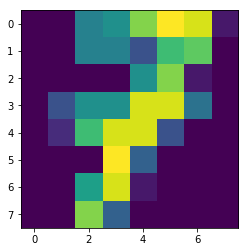

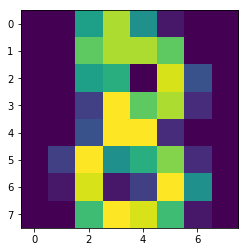

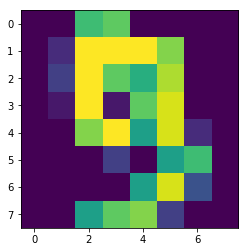

In [6]:
for i in range(10):
    plt.imshow(np.reshape(X[i], (8,8)))
    plt.pause(0.001)

In [7]:
no_trees = np.logspace(0,3,num = 10)
no_trees = np.rint(no_trees).astype('int32')
print(no_trees)

[   1    2    5   10   22   46  100  215  464 1000]


[0.9193099610461881, 0.9198664440734557, 0.9927657206455203, 0.9994435169727324, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


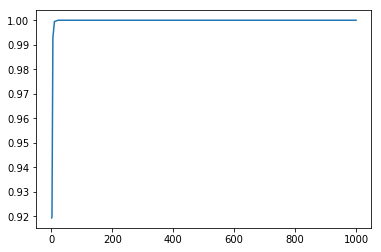

In [8]:
acc_list = []
for trees in no_trees:
    model = RandomForestClassifier(n_estimators = trees)
    model.fit(X, y)
    acc = model.score(X, y)
    acc_list.append(acc)
print(acc_list)
plt.plot(no_trees, acc_list)

- As the number of trees increases the model has better fit on the data, as we can see that the training data increases.

In [46]:
max_depth_list = np.linspace(1,10,10).astype('int32')

In [9]:
from tqdm import tqdm
acc_list = np.zeros((100, 10))

for tree in tqdm(range(100)):
    for depth in range(10):
        model = RandomForestClassifier(n_estimators = tree+1, max_depth = depth+1)
        model.fit(X, y)
        acc = model.score(X, y)
        acc_list[tree][depth] = acc

100%|██████████| 100/100 [02:12<00:00,  2.50s/it]


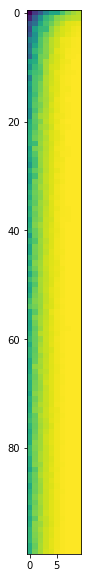

In [20]:
fig, ax = plt.subplots(figsize= (30,10))
ax.imshow(acc_list, interpolation='nearest')
#plt.imshow(acc_list, cmap = 'hot', interpolation = 'nearest')

- As we increase max_depth and no of trees the training accuracy increases this means we are overfitting on we tend to increase max depth and no of trees